Let us label the cells where the adversary can move below as cells 1 through 8. Cell number 6 is the starting cell for our adversary. The adversary can only randomly move to its adjacent cells.

In [1]:
import numpy as np
n = 5
m=8
Game_Grid = np.zeros((n, n))
Game_Grid[1, 1] = 1  #State 1
Game_Grid[1, 2] = 2  #State 2
Game_Grid[1, 3] = 3  #State 3
Game_Grid[2, 1] = 4  #State 4
Game_Grid[2, 3] = 5  #State 5
Game_Grid[3, 1] = 6  #State 6
Game_Grid[3, 2] = 7  #State 7
Game_Grid[3, 3] = 8  #State 8

Game_Grid_Inv={}
Game_Grid_Inv[1]=(1,1)
Game_Grid_Inv[2]=(1,2)
Game_Grid_Inv[3]=(1,3)
Game_Grid_Inv[4]=(2,1)
Game_Grid_Inv[5]=(2,3)
Game_Grid_Inv[6]=(3,1)
Game_Grid_Inv[7]=(3,2)
Game_Grid_Inv[8]=(3,3)

Game_Grid
#Game_Grid_Inv

array([[0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 0.],
       [0., 4., 0., 5., 0.],
       [0., 6., 7., 8., 0.],
       [0., 0., 0., 0., 0.]])

In [2]:
Game_Grid_Inv

{1: (1, 1),
 2: (1, 2),
 3: (1, 3),
 4: (2, 1),
 5: (2, 3),
 6: (3, 1),
 7: (3, 2),
 8: (3, 3)}

Trans_Matrix will be our transition probability matrix for the adversary.

In [3]:
m = np.sum(Game_Grid > 0)
Trans_Matrix = np.zeros((m, m))
Trans_Matrix[0,1] = 1
Trans_Matrix[1,2] = 1
Trans_Matrix[2,4] = 1
Trans_Matrix[3,0] = 1
Trans_Matrix[4,7] = 1
Trans_Matrix[5,3] = 1
Trans_Matrix[6,5] = 1
Trans_Matrix[7,6] = 1
#Trans_Matrix = np.linalg.inv(Trans_Matrix)
Trans_Matrix

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [4]:
from gurobipy import *
from itertools import combinations 
import networkx as nx
import numpy as np

def Manhattan_Distance(x,y):
    return np.abs(x[0]-y[0])+np.abs(x[1]-y[1])

## Construct network
grid_dimension=5
G=nx.Graph()
for i in range(grid_dimension):
    for j in range(grid_dimension):
        G.add_node((i,j))
        
for (i,j) in combinations(G.nodes(),2):
     if Manhattan_Distance(i,j)<=1:
            G.add_edge(i,j)
pos={}
for i in G.nodes():
    pos[i]=(int(i[0]), 5-int(i[1]))
    
nx.draw(G,pos)

ModuleNotFoundError: No module named 'gurobipy'

In [6]:
starting_agent_location=(0,0)
for i in G.nodes():
    #print(i)
    G.nodes[i]['reward']=False
    G.nodes[i]['possible_adversary']=False
    G.nodes[i]['current_agent']=False
    G.nodes[i]['current_adversary']=False
G.nodes[(2,2)]['reward']=True
adversaryMoveset=[(1,1), (1,2), (1,3), (2,1), (2,3), (3,1), (3,2), (3,3)]
for i in adversaryMoveset:
    G.nodes[i]['possible_adversary']=True

starting_adversary_location=(1,1)
G.nodes[starting_agent_location]['current_agent']=True
G.nodes[starting_adversary_location]['current_adversary']=True



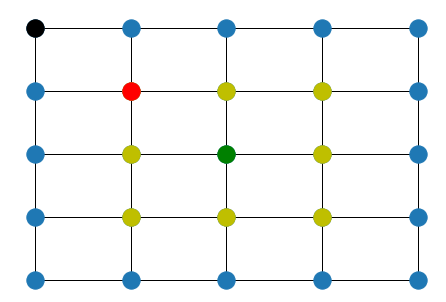

In [7]:
nx.draw(G,pos)
nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if i==starting_agent_location], node_color='black')    
nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i]['reward']], node_color='g')    
nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i]['possible_adversary']], node_color='y')
nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i]['current_adversary']], node_color='r')

### Set definitions

In [12]:
grid_dimension=5
starting_agent_location=(0,0)
dest=(4,4)
rew=(2,2)
T=grid_dimension*grid_dimension
done=False
captured=False
maxReward=100

current_agent_location=starting_agent_location
current_adversary_location=starting_adversary_location
#current_location=starting_location
current_time=0
current_adversary_loc = (int(Game_Grid[current_adversary_location[1],current_adversary_location[0]]))

#print(current_agent_location[0], current_agent_location[1])

### Main online optimization

number of successes 1
average reward: 294.0
average regret: 0.0
time:  0.9540450572967529


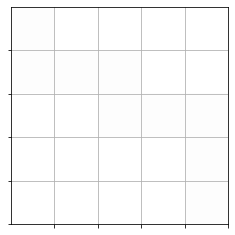

In [15]:
from collections import Counter
import time


from random import choices
y = 0
m = np.sum(Game_Grid > 0)
obs_trans_matrix = np.zeros((m,m))
for f in range(0,24):
    choose=choices(range(0,8), Trans_Matrix[current_adversary_loc-1,:])
    next_adversary_location=(Game_Grid_Inv[choose[0]+1][1],Game_Grid_Inv[choose[0]+1][0])
    next_adversary_loc=int(Game_Grid[next_adversary_location[1],next_adversary_location[0]])
    obs_trans_matrix[current_adversary_loc-1,next_adversary_loc-1] += 1
    current_adversary_loc = next_adversary_loc
    current_adversary_location = next_adversary_location
    
for i in range(m):
    obs_trans_matrix[i, ] = obs_trans_matrix[i, ]/np.sum(obs_trans_matrix[i,:])
obs_trans_matrix


start_time = time.time()
reward = {}
importance=100000
n_success = 0
total_reward = 0
total_regret = 0
average_agent_heatmap = {}
for j in range(0,5):
    for k in range(0,5):
        average_agent_heatmap[(j,k)] = 1

#print(current_agent_location[0], current_agent_location[1])
for e in range(1):
    agent_heatmap = {}
    for j in range(0,5):
        for k in range(0,5):
            agent_heatmap[(j,k)] = 0
    reward[e] = 0
    done=False
    captured=False
    current_agent_location=starting_agent_location
    current_adversary_location=starting_adversary_location
    current_agent_location=starting_agent_location
    current_time=0
    while True:
        #print("Current Time:" + str(current_time))
        ####################
        ##Printing details##
        ####################
        current_adversary_loc=int(Game_Grid[current_adversary_location[1],current_adversary_location[0]])
        #print("Current agent location: "+str(current_agent_location))
        #print("Current adversary location: "+str(current_adversary_location)+" or "+str(current_adversary_loc))
        #print(current_adversary_loc)
        #print("Current time: "+str(current_time))
        
        agent_heatmap[(current_agent_location[1],current_agent_location[0])] -= .01

        if current_agent_location==current_adversary_location:
            #print("Captured")
            break
        if done==True:
            average_agent_heatmap = Counter(average_agent_heatmap) + Counter(agent_heatmap)
            n_success += 1
            total_reward += reward[e]
            total_regret += (294-reward[e])
            #print("Successful")
            break

        ######################
        ##Setting up rewards##
        ######################
        if captured:
            destination=dest
        else:
            destination=rew 
        #print(destination)
        r={}
        for (i,d) in G.nodes(data=True):
            if d['reward']==True and not captured:
                r[i]=maxReward
            else:
                r[i]=0

        ########################
        ##Setting up penalties##
        ########################
        p={}
        for (i,d) in G.nodes(data=True):
            p[i]={}
            p[i][current_time]=0

        for t in range(current_time, T):
            original_probabilities = np.linalg.matrix_power(obs_trans_matrix, t+1-current_time)[current_adversary_loc-1,] # probabilities using matrix power function 
            for (i,d) in G.nodes(data=True):
                if d['possible_adversary']==True:
                    p[i][t]=original_probabilities[int(Game_Grid[i[1],i[0]])-1]
                    #print((Game_Grid[i[1],i[0]])-1)
                else:
                    p[i][t]=0
        
                
        

        ####################
        ##Setting up model##
        ####################          
        model=Model("model_time"+str(current_time))
        model.setParam('OutputFlag', 0) 
        x={}
        y={}
        for i in G.nodes():
            y[i]={}
            y[i][current_time]=model.addVar(vtype=GRB.BINARY, name="y"+str(i)+","+str(t))
            for t in range(current_time, T):
                y[i][t+1]=model.addVar(vtype=GRB.BINARY,obj=t-r[i]+importance*p[i][t], name="y"+str(i)+","+str(t))
        for (i,j) in G.edges():
            x[i,j]={}
            x[j,i]={}
            for t in range(current_time, T):
                x[i,j][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(i)+","+str(j)+","+str(t))
                x[j,i][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(j)+","+str(i)+","+str(t))


        ################################
        ## Setting up the constraints ##
        model.addConstr(y[current_agent_location[0], current_agent_location[1]][current_time]==1) 
        ################################

        # constraints (2b)
        for t in range(current_time, T):
            #print("time:"+str(t))
            model.addConstr(quicksum(y[i[0],i[1]][t] for i in G.nodes()) <= 1)

         # constraints (2b)
        for i in G.nodes():
            model.addConstr(quicksum(y[i[0],i[1]][t] for t in range(current_time,T)) <= 1)

        # constraints (2c)
        for i in G.nodes():
            for t in range(current_time+1, T):
                model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==y[i][t])

        # constraints (2d)
        for i in G.nodes():
            if i!=destination and i!=current_agent_location:
                for t in range(current_time+1, T):
                    model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==quicksum(x[i,j][t] for j in G[i]))#, name=str(i))

        # constraint (2e)
        model.addConstr(quicksum(x[current_agent_location, j][current_time] for j in G[current_agent_location])==1)

        # constraint (2f)
        expr=LinExpr()
        for j in G[destination]:
            for t in range(current_time, T):
                expr+=x[j, destination][t]
        model.addConstr(expr==1)

        #model.write("myModel"+str(current_time)+".lp")

        model.optimize()
        next_location=-1
        for t in range(current_time, T):
            for (i,j) in G.edges():
                if x[i,j][t].X==1:
                    #print(t)
                    #print(i,j)
                    if t==current_time:
                        next_location=j
                if x[j,i][t].X==1:
                    #print(t)
                    #print(j,i)
                    if t==current_time:
                        next_location=i
        for i in G.nodes():
            if y[i][current_time].X==1:
                #print(i)
                continue

        current_agent_location=next_location 

        #print("Next agent location: " + str(next_location))
        for (i,d) in G.nodes(data=True):
            if d['reward']==True:
                if str(i)==str(next_location):
                    captured=True
                    #print("Just captured")



        current_time+=1

        ### THIS IS THE PART THAT NEEDS UPDATING ########
        from random import choices
        choose=choices(range(0,8), Trans_Matrix[current_adversary_loc-1,:])
        #print(choose)
        next_adversary_location=(Game_Grid_Inv[choose[0]+1][1],Game_Grid_Inv[choose[0]+1][0])
        ########################################

        current_adversary_location=next_adversary_location
        #print("Next adversary location: " + str(next_adversary_location))

        if current_agent_location == current_adversary_location:
            reward[e] -= 1000
        elif current_agent_location == (2,2):
            if agent_heatmap[current_agent_location] == 0:
                reward[e] += 200
            else:
                reward[e] -= 1
        elif current_agent_location == destination:
            reward[e] += 100
        else:
            reward[e] -= 1

        if current_agent_location==dest:
            #if captured == True:
                #print("Won Game")
                #zprint(reward)
            done=True
            
            
import matplotlib.pyplot as plt
plt.grid('on')
n = 5
ax = plt.gca()
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
canvas = maze = np.array([
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
    ])
for cell in average_agent_heatmap:
    canvas[cell] = average_agent_heatmap[cell]
img1 = plt.imshow(canvas, interpolation='none', cmap='gray', vmin=0, vmax=1)
print("number of successes",n_success)
print("average reward:",total_reward/n_success)
print("average regret:",total_regret/n_success)
print("time: ", time.time()-start_time)
    

In [1]:
import time
start_time = time.time()
import numpy as np
n = 5
m=8
Game_Grid = np.zeros((n, n))
Game_Grid[1, 1] = 1  #State 1
Game_Grid[1, 2] = 2  #State 2
Game_Grid[1, 3] = 3  #State 3
Game_Grid[2, 1] = 4  #State 4
Game_Grid[2, 3] = 5  #State 5
Game_Grid[3, 1] = 6  #State 6
Game_Grid[3, 2] = 7  #State 7
Game_Grid[3, 3] = 8  #State 8

Game_Grid_Inv={}
Game_Grid_Inv[1]=(1,1)
Game_Grid_Inv[2]=(1,2)
Game_Grid_Inv[3]=(1,3)
Game_Grid_Inv[4]=(2,1)
Game_Grid_Inv[5]=(2,3)
Game_Grid_Inv[6]=(3,1)
Game_Grid_Inv[7]=(3,2)
Game_Grid_Inv[8]=(3,3)

m = np.sum(Game_Grid > 0)
Trans_Matrix = np.zeros((m, m))
Trans_Matrix[0,1] = 1
Trans_Matrix[1,2] = 1
Trans_Matrix[2,4] = 1
Trans_Matrix[3,0] = 1
Trans_Matrix[4,7] = 1
Trans_Matrix[5,3] = 1
Trans_Matrix[6,5] = 1
Trans_Matrix[7,6] = 1

from gurobipy import *
from itertools import combinations 
import networkx as nx
import numpy as np

def Manhattan_Distance(x,y):
    return np.abs(x[0]-y[0])+np.abs(x[1]-y[1])

## Construct network
grid_dimension=5
G=nx.Graph()
for i in range(grid_dimension):
    for j in range(grid_dimension):
        G.add_node((i,j))
        
for (i,j) in combinations(G.nodes(),2):
     if Manhattan_Distance(i,j)<=1:
            G.add_edge(i,j)
pos={}
for i in G.nodes():
    pos[i]=(int(i[0]), 5-int(i[1]))
    
starting_agent_location=(0,0)
for i in G.nodes():
    #print(i)
    G.nodes[i]['reward']=False
    G.nodes[i]['possible_adversary']=False
    G.nodes[i]['current_agent']=False
    G.nodes[i]['current_adversary']=False
G.nodes[(2,2)]['reward']=True
adversaryMoveset=[(1,1), (1,2), (1,3), (2,1), (2,3), (3,1), (3,2), (3,3)]
for i in adversaryMoveset:
    G.nodes[i]['possible_adversary']=True

starting_adversary_location=(1,1)
G.nodes[starting_agent_location]['current_agent']=True
G.nodes[starting_adversary_location]['current_adversary']=True

grid_dimension=5
starting_agent_location=(0,0)
dest=(4,4)
rew=(2,2)
T=grid_dimension*grid_dimension
done=False
captured=False
maxReward=100

current_agent_location=starting_agent_location
current_adversary_location=starting_adversary_location
#current_location=starting_location
current_time=0
current_adversary_loc = (int(Game_Grid[current_adversary_location[1],current_adversary_location[0]]))

from random import choices
y = 0
m = np.sum(Game_Grid > 0)
obs_trans_matrix = np.zeros((m,m))
for f in range(0,8):
    choose=choices(range(0,8), Trans_Matrix[current_adversary_loc-1,:])
    next_adversary_location=(Game_Grid_Inv[choose[0]+1][1],Game_Grid_Inv[choose[0]+1][0])
    next_adversary_loc=int(Game_Grid[next_adversary_location[1],next_adversary_location[0]])
    obs_trans_matrix[current_adversary_loc-1,next_adversary_loc-1] += 1
    current_adversary_loc = next_adversary_loc
    current_adversary_location = next_adversary_location
    
for i in range(m):
    obs_trans_matrix[i, ] = obs_trans_matrix[i, ]/np.sum(obs_trans_matrix[i,:])

from collections import Counter
reward = {}
importance=100000
n_success = 0
total_reward = 0
total_regret = 0
average_agent_heatmap = {}
for j in range(0,5):
    for k in range(0,5):
        average_agent_heatmap[(j,k)] = 1

#print(current_agent_location[0], current_agent_location[1])
for e in range(50):
    agent_heatmap = {}
    for j in range(0,5):
        for k in range(0,5):
            agent_heatmap[(j,k)] = 0
    reward[e] = 0
    done=False
    captured=False
    current_agent_location=starting_agent_location
    current_adversary_location=starting_adversary_location
    current_agent_location=starting_agent_location
    current_time=0
    while True:
        #print("Current Time:" + str(current_time))
        ####################
        ##Printing details##
        ####################
        current_adversary_loc=int(Game_Grid[current_adversary_location[1],current_adversary_location[0]])
        #print("Current agent location: "+str(current_agent_location))
        #print("Current adversary location: "+str(current_adversary_location)+" or "+str(current_adversary_loc))
        #print(current_adversary_loc)
        #print("Current time: "+str(current_time))
        
        agent_heatmap[(current_agent_location[1],current_agent_location[0])] -= .01

        if current_agent_location==current_adversary_location:
            #print("Captured")
            break
        if done==True:
            average_agent_heatmap = Counter(average_agent_heatmap) + Counter(agent_heatmap)
            n_success += 1
            total_reward += reward[e]
            total_regret += (294-reward[e])
            #print("Successful")
            break

        ######################
        ##Setting up rewards##
        ######################
        if captured:
            destination=dest
        else:
            destination=rew 
        #print(destination)
        r={}
        for (i,d) in G.nodes(data=True):
            if d['reward']==True and not captured:
                r[i]=maxReward
            else:
                r[i]=0

        ########################
        ##Setting up penalties##
        ########################
        p={}
        for (i,d) in G.nodes(data=True):
            p[i]={}
            p[i][current_time]=0

        for t in range(current_time, T):
            original_probabilities = np.linalg.matrix_power(obs_trans_matrix, t+1-current_time)[current_adversary_loc-1,] # probabilities using matrix power function 
            for (i,d) in G.nodes(data=True):
                if d['possible_adversary']==True:
                    p[i][t]=original_probabilities[int(Game_Grid[i[1],i[0]])-1]
                    #print((Game_Grid[i[1],i[0]])-1)
                else:
                    p[i][t]=0
        
        

        ####################
        ##Setting up model##
        ####################          
        model=Model("model_time"+str(current_time))
        model.setParam('OutputFlag', 0) 
        x={}
        y={}
        for i in G.nodes():
            y[i]={}
            y[i][current_time]=model.addVar(vtype=GRB.BINARY, name="y"+str(i)+","+str(t))
            for t in range(current_time, T):
                y[i][t+1]=model.addVar(vtype=GRB.BINARY,obj=t-r[i]+importance*p[i][t], name="y"+str(i)+","+str(t))
        for (i,j) in G.edges():
            x[i,j]={}
            x[j,i]={}
            for t in range(current_time, T):
                x[i,j][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(i)+","+str(j)+","+str(t))
                x[j,i][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(j)+","+str(i)+","+str(t))


        ################################
        ## Setting up the constraints ##
        model.addConstr(y[current_agent_location[0], current_agent_location[1]][current_time]==1) 
        ################################

        # constraints (2b)
        for t in range(current_time, T):
            #print("time:"+str(t))
            model.addConstr(quicksum(y[i[0],i[1]][t] for i in G.nodes()) <= 1)

         # constraints (2b)
        for i in G.nodes():
            model.addConstr(quicksum(y[i[0],i[1]][t] for t in range(current_time,T)) <= 1)

        # constraints (2c)
        for i in G.nodes():
            for t in range(current_time+1, T):
                model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==y[i][t])

        # constraints (2d)
        for i in G.nodes():
            if i!=destination and i!=current_agent_location:
                for t in range(current_time+1, T):
                    model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==quicksum(x[i,j][t] for j in G[i]))#, name=str(i))

        # constraint (2e)
        model.addConstr(quicksum(x[current_agent_location, j][current_time] for j in G[current_agent_location])==1)

        # constraint (2f)
        expr=LinExpr()
        for j in G[destination]:
            for t in range(current_time, T):
                expr+=x[j, destination][t]
        model.addConstr(expr==1)

        #model.write("myModel"+str(current_time)+".lp")

        model.optimize()
        next_location=-1
        for t in range(current_time, T):
            for (i,j) in G.edges():
                if x[i,j][t].X==1:
                    #print(t)
                    #print(i,j)
                    if t==current_time:
                        next_location=j
                if x[j,i][t].X==1:
                    #print(t)
                    #print(j,i)
                    if t==current_time:
                        next_location=i
        for i in G.nodes():
            if y[i][current_time].X==1:
                #print(i)
                continue

        current_agent_location=next_location 

        #print("Next agent location: " + str(next_location))
        for (i,d) in G.nodes(data=True):
            if d['reward']==True:
                if str(i)==str(next_location):
                    captured=True
                    #print("Just captured")



        current_time+=1

        ### THIS IS THE PART THAT NEEDS UPDATING ########
        choose=choices(range(0,8), Trans_Matrix[current_adversary_loc-1,:])
        #print(choose)
        next_adversary_location=(Game_Grid_Inv[choose[0]+1][1],Game_Grid_Inv[choose[0]+1][0])
        ########################################

        current_adversary_location=next_adversary_location
        #print("Next adversary location: " + str(next_adversary_location))

        if current_agent_location == current_adversary_location:
            reward[e] -= 1000
        elif current_agent_location == (2,2):
            if agent_heatmap[current_agent_location] == 0:
                reward[e] += 200
            else:
                reward[e] -= 1
        elif current_agent_location == destination:
            reward[e] += 100
        else:
            reward[e] -= 1

        if current_agent_location==dest:
            #if captured == True:
                #print("Won Game")
                #zprint(reward)
            done=True
            
            
import matplotlib.pyplot as plt
plt.grid('on')
n = 5
ax = plt.gca()
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
canvas = maze = np.array([
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
    ])
for cell in average_agent_heatmap:
    canvas[cell] = average_agent_heatmap[cell]
img1 = plt.imshow(canvas, interpolation='none', cmap='gray', vmin=0, vmax=1)
print("number of successes",n_success)
print("average reward:",total_reward/n_success)
print("average regret:",total_regret/n_success)
print("time: ", time.time()-start_time)

Using license file /Users/madeleine/gurobi.lic
Academic license - for non-commercial use only
number of successes 50
average reward: 294.0
average regret: 0.0
time:  48.88817811012268
